## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np
from pytorch_tabnet.tab_model import TabNetRegressor

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 0


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  16.540951  1118.368795  0.113040  8.852848  1.281187
1  18.297197  1425.596835  0.401407  1.955693  1.610796
2  57.262617   823.368103  0.646039  1.324830  1.578436
3  24.880414   465.475632  0.083316  1.944527  1.196381
4  81.002318  1160.008503  0.009400  9.261934  0.069931


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model

Y_train = np.reshape(Y_train, (-1, 1))
Y_test = np.reshape(Y_test, (-1, 1))

prior_model = TabNetRegressor(optimizer_fn=torch.optim.Adam, optimizer_params=dict(lr = 0.001),
          #scheduler_params={"step_size":10, ], "gamma":0.9},
          #scheduler_fn=torch.optim.lr_scheduler.StepLR
          )  #TabNetRegressor()

prior_model.fit(X_train,Y_train,eval_set=[(X_train, Y_train)],
            eval_name=['train'], 
            eval_metric=[ 'mse', 'mae'], 
            max_epochs = n_epochs, 
            batch_size = batch_size,
            patience=50
            )

Device used : cpu


epoch 0  | loss: 1.27234 | train_mse: 5.18288 | train_mae: 1.67241 |  0:00:00s
epoch 1  | loss: 1.15201 | train_mse: 3.72313 | train_mae: 1.42807 |  0:00:00s
epoch 2  | loss: 0.98601 | train_mse: 3.00495 | train_mae: 1.32307 |  0:00:00s


epoch 3  | loss: 1.00891 | train_mse: 2.40953 | train_mae: 1.20247 |  0:00:00s
epoch 4  | loss: 0.92589 | train_mse: 2.07386 | train_mae: 1.13984 |  0:00:00s
epoch 5  | loss: 0.99989 | train_mse: 1.82309 | train_mae: 1.06542 |  0:00:00s


epoch 6  | loss: 0.82623 | train_mse: 1.73859 | train_mae: 1.05173 |  0:00:00s
epoch 7  | loss: 0.87892 | train_mse: 1.50022 | train_mae: 0.98446 |  0:00:00s
epoch 8  | loss: 0.69806 | train_mse: 1.32194 | train_mae: 0.91726 |  0:00:00s


epoch 9  | loss: 0.68511 | train_mse: 1.22598 | train_mae: 0.88546 |  0:00:01s
epoch 10 | loss: 0.64697 | train_mse: 1.15279 | train_mae: 0.85262 |  0:00:01s


epoch 11 | loss: 0.70817 | train_mse: 1.08661 | train_mae: 0.82452 |  0:00:01s
epoch 12 | loss: 0.69243 | train_mse: 1.0214  | train_mae: 0.80331 |  0:00:01s


epoch 13 | loss: 0.57101 | train_mse: 0.97188 | train_mae: 0.7813  |  0:00:01s
epoch 14 | loss: 0.72121 | train_mse: 0.89885 | train_mae: 0.7501  |  0:00:01s


epoch 15 | loss: 0.6834  | train_mse: 0.8247  | train_mae: 0.71476 |  0:00:01s
epoch 16 | loss: 0.54121 | train_mse: 0.79814 | train_mae: 0.70505 |  0:00:02s


epoch 17 | loss: 0.55787 | train_mse: 0.75562 | train_mae: 0.6772  |  0:00:02s
epoch 18 | loss: 0.66502 | train_mse: 0.71532 | train_mae: 0.65437 |  0:00:02s


epoch 19 | loss: 0.6336  | train_mse: 0.68439 | train_mae: 0.63623 |  0:00:02s
epoch 20 | loss: 0.50656 | train_mse: 0.66033 | train_mae: 0.62078 |  0:00:02s


epoch 21 | loss: 0.69465 | train_mse: 0.64496 | train_mae: 0.61038 |  0:00:02s
epoch 22 | loss: 0.53372 | train_mse: 0.61419 | train_mae: 0.59391 |  0:00:02s


epoch 23 | loss: 0.60241 | train_mse: 0.58702 | train_mae: 0.57877 |  0:00:02s
epoch 24 | loss: 0.48823 | train_mse: 0.56707 | train_mae: 0.56455 |  0:00:03s


epoch 25 | loss: 0.5726  | train_mse: 0.5393  | train_mae: 0.55163 |  0:00:03s
epoch 26 | loss: 0.5179  | train_mse: 0.51719 | train_mae: 0.53924 |  0:00:03s


epoch 27 | loss: 0.4941  | train_mse: 0.49422 | train_mae: 0.52472 |  0:00:03s
epoch 28 | loss: 0.60514 | train_mse: 0.48363 | train_mae: 0.5178  |  0:00:03s


epoch 29 | loss: 0.37517 | train_mse: 0.46696 | train_mae: 0.50383 |  0:00:03s
epoch 30 | loss: 0.41774 | train_mse: 0.45169 | train_mae: 0.49244 |  0:00:03s


epoch 31 | loss: 0.6654  | train_mse: 0.44086 | train_mae: 0.48498 |  0:00:03s
epoch 32 | loss: 0.58869 | train_mse: 0.42498 | train_mae: 0.47824 |  0:00:03s


epoch 33 | loss: 0.46536 | train_mse: 0.40685 | train_mae: 0.46961 |  0:00:04s
epoch 34 | loss: 0.43856 | train_mse: 0.39079 | train_mae: 0.45912 |  0:00:04s


epoch 35 | loss: 0.42384 | train_mse: 0.38267 | train_mae: 0.45282 |  0:00:04s
epoch 36 | loss: 0.39434 | train_mse: 0.36975 | train_mae: 0.4382  |  0:00:04s


epoch 37 | loss: 0.5725  | train_mse: 0.36406 | train_mae: 0.43007 |  0:00:04s
epoch 38 | loss: 0.44622 | train_mse: 0.35414 | train_mae: 0.41767 |  0:00:04s
epoch 39 | loss: 0.34091 | train_mse: 0.34866 | train_mae: 0.4135  |  0:00:04s


epoch 40 | loss: 0.47714 | train_mse: 0.34224 | train_mae: 0.40695 |  0:00:04s
epoch 41 | loss: 0.50558 | train_mse: 0.33336 | train_mae: 0.40035 |  0:00:05s
epoch 42 | loss: 0.42465 | train_mse: 0.32871 | train_mae: 0.39342 |  0:00:05s


epoch 43 | loss: 0.42566 | train_mse: 0.32586 | train_mae: 0.38908 |  0:00:05s
epoch 44 | loss: 0.30253 | train_mse: 0.32556 | train_mae: 0.38718 |  0:00:05s
epoch 45 | loss: 0.35707 | train_mse: 0.32183 | train_mae: 0.38464 |  0:00:05s


epoch 46 | loss: 0.4037  | train_mse: 0.31597 | train_mae: 0.37898 |  0:00:05s
epoch 47 | loss: 0.39351 | train_mse: 0.31142 | train_mae: 0.37439 |  0:00:05s


epoch 48 | loss: 0.31665 | train_mse: 0.30333 | train_mae: 0.36913 |  0:00:05s
epoch 49 | loss: 0.48227 | train_mse: 0.29557 | train_mae: 0.36613 |  0:00:05s
epoch 50 | loss: 0.46185 | train_mse: 0.28725 | train_mae: 0.36091 |  0:00:05s


epoch 51 | loss: 0.43813 | train_mse: 0.27953 | train_mae: 0.35448 |  0:00:05s
epoch 52 | loss: 0.31356 | train_mse: 0.27424 | train_mae: 0.34915 |  0:00:06s
epoch 53 | loss: 0.22948 | train_mse: 0.26954 | train_mae: 0.34266 |  0:00:06s


epoch 54 | loss: 0.42574 | train_mse: 0.26484 | train_mae: 0.34018 |  0:00:06s
epoch 55 | loss: 0.2954  | train_mse: 0.2617  | train_mae: 0.33884 |  0:00:06s
epoch 56 | loss: 0.33171 | train_mse: 0.25902 | train_mae: 0.33922 |  0:00:06s


epoch 57 | loss: 0.36996 | train_mse: 0.25308 | train_mae: 0.33748 |  0:00:06s
epoch 58 | loss: 0.38901 | train_mse: 0.24911 | train_mae: 0.33642 |  0:00:06s


epoch 59 | loss: 0.33709 | train_mse: 0.24504 | train_mae: 0.3346  |  0:00:06s
epoch 60 | loss: 0.36232 | train_mse: 0.24262 | train_mae: 0.33427 |  0:00:06s
epoch 61 | loss: 0.29213 | train_mse: 0.24124 | train_mae: 0.33425 |  0:00:06s


epoch 62 | loss: 0.30886 | train_mse: 0.24104 | train_mae: 0.33507 |  0:00:07s
epoch 63 | loss: 0.34513 | train_mse: 0.23979 | train_mae: 0.33812 |  0:00:07s
epoch 64 | loss: 0.29745 | train_mse: 0.24055 | train_mae: 0.33984 |  0:00:07s


epoch 65 | loss: 0.33349 | train_mse: 0.24222 | train_mae: 0.34251 |  0:00:07s
epoch 66 | loss: 0.28642 | train_mse: 0.24102 | train_mae: 0.34248 |  0:00:07s
epoch 67 | loss: 0.57928 | train_mse: 0.24013 | train_mae: 0.34165 |  0:00:07s


epoch 68 | loss: 0.24888 | train_mse: 0.23378 | train_mae: 0.33569 |  0:00:07s
epoch 69 | loss: 0.28511 | train_mse: 0.22925 | train_mae: 0.33135 |  0:00:07s


epoch 70 | loss: 0.21496 | train_mse: 0.22669 | train_mae: 0.32869 |  0:00:07s
epoch 71 | loss: 0.29716 | train_mse: 0.22393 | train_mae: 0.32422 |  0:00:07s
epoch 72 | loss: 0.28133 | train_mse: 0.22205 | train_mae: 0.32251 |  0:00:07s


epoch 73 | loss: 0.28828 | train_mse: 0.21676 | train_mae: 0.3181  |  0:00:08s
epoch 74 | loss: 0.27822 | train_mse: 0.2121  | train_mae: 0.31647 |  0:00:08s
epoch 75 | loss: 0.20281 | train_mse: 0.21009 | train_mae: 0.31854 |  0:00:08s


epoch 76 | loss: 0.41149 | train_mse: 0.20819 | train_mae: 0.31813 |  0:00:08s
epoch 77 | loss: 0.23689 | train_mse: 0.20441 | train_mae: 0.32109 |  0:00:08s


epoch 78 | loss: 0.55116 | train_mse: 0.20263 | train_mae: 0.32461 |  0:00:08s
epoch 79 | loss: 0.23644 | train_mse: 0.20728 | train_mae: 0.32508 |  0:00:08s
epoch 80 | loss: 0.37991 | train_mse: 0.20503 | train_mae: 0.32241 |  0:00:08s


epoch 81 | loss: 0.31195 | train_mse: 0.20536 | train_mae: 0.32196 |  0:00:08s
epoch 82 | loss: 0.21814 | train_mse: 0.20494 | train_mae: 0.32064 |  0:00:08s


epoch 83 | loss: 0.37421 | train_mse: 0.20006 | train_mae: 0.31691 |  0:00:08s
epoch 84 | loss: 0.24031 | train_mse: 0.19567 | train_mae: 0.31574 |  0:00:09s
epoch 85 | loss: 0.25284 | train_mse: 0.19193 | train_mae: 0.31458 |  0:00:09s


epoch 86 | loss: 0.29187 | train_mse: 0.19131 | train_mae: 0.31189 |  0:00:09s
epoch 87 | loss: 0.30452 | train_mse: 0.19121 | train_mae: 0.3066  |  0:00:09s
epoch 88 | loss: 0.30194 | train_mse: 0.18763 | train_mae: 0.30245 |  0:00:09s


epoch 89 | loss: 0.28211 | train_mse: 0.18675 | train_mae: 0.30082 |  0:00:09s
epoch 90 | loss: 0.3015  | train_mse: 0.19028 | train_mae: 0.30653 |  0:00:09s
epoch 91 | loss: 0.32091 | train_mse: 0.18682 | train_mae: 0.30579 |  0:00:09s


epoch 92 | loss: 0.27601 | train_mse: 0.18431 | train_mae: 0.3058  |  0:00:09s
epoch 93 | loss: 0.33856 | train_mse: 0.18449 | train_mae: 0.30798 |  0:00:09s
epoch 94 | loss: 0.2863  | train_mse: 0.18397 | train_mae: 0.3061  |  0:00:09s


epoch 95 | loss: 0.30583 | train_mse: 0.18218 | train_mae: 0.30433 |  0:00:10s
epoch 96 | loss: 0.26919 | train_mse: 0.17925 | train_mae: 0.30387 |  0:00:10s
epoch 97 | loss: 0.3176  | train_mse: 0.17776 | train_mae: 0.30405 |  0:00:10s


epoch 98 | loss: 0.49535 | train_mse: 0.17724 | train_mae: 0.30387 |  0:00:10s
epoch 99 | loss: 0.19548 | train_mse: 0.17924 | train_mae: 0.30654 |  0:00:10s
epoch 100| loss: 0.37473 | train_mse: 0.17598 | train_mae: 0.30558 |  0:00:10s


epoch 101| loss: 0.26464 | train_mse: 0.17255 | train_mae: 0.30377 |  0:00:10s
epoch 102| loss: 0.29268 | train_mse: 0.17057 | train_mae: 0.30138 |  0:00:10s
epoch 103| loss: 0.30049 | train_mse: 0.17133 | train_mae: 0.30251 |  0:00:10s


epoch 104| loss: 0.33214 | train_mse: 0.17084 | train_mae: 0.30191 |  0:00:10s
epoch 105| loss: 0.26662 | train_mse: 0.16874 | train_mae: 0.2961  |  0:00:10s
epoch 106| loss: 0.39187 | train_mse: 0.16754 | train_mae: 0.29281 |  0:00:10s


epoch 107| loss: 0.23584 | train_mse: 0.16969 | train_mae: 0.29136 |  0:00:11s
epoch 108| loss: 0.36524 | train_mse: 0.16912 | train_mae: 0.28561 |  0:00:11s
epoch 109| loss: 0.26631 | train_mse: 0.17325 | train_mae: 0.28708 |  0:00:11s


epoch 110| loss: 0.3276  | train_mse: 0.17274 | train_mae: 0.28344 |  0:00:11s
epoch 111| loss: 0.29261 | train_mse: 0.16844 | train_mae: 0.28083 |  0:00:11s
epoch 112| loss: 0.26108 | train_mse: 0.16209 | train_mae: 0.27346 |  0:00:11s


epoch 113| loss: 0.26044 | train_mse: 0.15717 | train_mae: 0.26451 |  0:00:11s
epoch 114| loss: 0.1798  | train_mse: 0.15469 | train_mae: 0.26408 |  0:00:11s
epoch 115| loss: 0.194   | train_mse: 0.15426 | train_mae: 0.26606 |  0:00:11s


epoch 116| loss: 0.37439 | train_mse: 0.15443 | train_mae: 0.26743 |  0:00:11s
epoch 117| loss: 0.18849 | train_mse: 0.15697 | train_mae: 0.27296 |  0:00:11s
epoch 118| loss: 0.32571 | train_mse: 0.15895 | train_mae: 0.27665 |  0:00:12s


epoch 119| loss: 0.35965 | train_mse: 0.1579  | train_mae: 0.27788 |  0:00:12s
epoch 120| loss: 0.31092 | train_mse: 0.15615 | train_mae: 0.28364 |  0:00:12s
epoch 121| loss: 0.23563 | train_mse: 0.1528  | train_mae: 0.28367 |  0:00:12s


epoch 122| loss: 0.30269 | train_mse: 0.14817 | train_mae: 0.27721 |  0:00:12s
epoch 123| loss: 0.18671 | train_mse: 0.14643 | train_mae: 0.27313 |  0:00:12s
epoch 124| loss: 0.29637 | train_mse: 0.14434 | train_mae: 0.27379 |  0:00:12s


epoch 125| loss: 0.15933 | train_mse: 0.14528 | train_mae: 0.27523 |  0:00:12s
epoch 126| loss: 0.38837 | train_mse: 0.13714 | train_mae: 0.26768 |  0:00:12s
epoch 127| loss: 0.23291 | train_mse: 0.12893 | train_mae: 0.26316 |  0:00:12s


epoch 128| loss: 0.15189 | train_mse: 0.12036 | train_mae: 0.25456 |  0:00:12s
epoch 129| loss: 0.49463 | train_mse: 0.11849 | train_mae: 0.25159 |  0:00:13s
epoch 130| loss: 0.17388 | train_mse: 0.1217  | train_mae: 0.25417 |  0:00:13s


epoch 131| loss: 0.28993 | train_mse: 0.12696 | train_mae: 0.25903 |  0:00:13s
epoch 132| loss: 0.27995 | train_mse: 0.13593 | train_mae: 0.26532 |  0:00:13s
epoch 133| loss: 0.19013 | train_mse: 0.14113 | train_mae: 0.2685  |  0:00:13s


epoch 134| loss: 0.34023 | train_mse: 0.14406 | train_mae: 0.27305 |  0:00:13s
epoch 135| loss: 0.33539 | train_mse: 0.15781 | train_mae: 0.28499 |  0:00:13s
epoch 136| loss: 0.34334 | train_mse: 0.17623 | train_mae: 0.29458 |  0:00:13s


epoch 137| loss: 0.21621 | train_mse: 0.17113 | train_mae: 0.29008 |  0:00:13s
epoch 138| loss: 0.19415 | train_mse: 0.17575 | train_mae: 0.29528 |  0:00:13s
epoch 139| loss: 0.34871 | train_mse: 0.17882 | train_mae: 0.29694 |  0:00:13s


epoch 140| loss: 0.18365 | train_mse: 0.17273 | train_mae: 0.29339 |  0:00:13s
epoch 141| loss: 0.20289 | train_mse: 0.15697 | train_mae: 0.28362 |  0:00:14s
epoch 142| loss: 0.40269 | train_mse: 0.15186 | train_mae: 0.28108 |  0:00:14s


epoch 143| loss: 0.23783 | train_mse: 0.13684 | train_mae: 0.26776 |  0:00:14s
epoch 144| loss: 0.18851 | train_mse: 0.12799 | train_mae: 0.26646 |  0:00:14s
epoch 145| loss: 0.23318 | train_mse: 0.1267  | train_mae: 0.26635 |  0:00:14s


epoch 146| loss: 0.17998 | train_mse: 0.12665 | train_mae: 0.26919 |  0:00:14s
epoch 147| loss: 0.16944 | train_mse: 0.12375 | train_mae: 0.26597 |  0:00:14s


epoch 148| loss: 0.21436 | train_mse: 0.11904 | train_mae: 0.25854 |  0:00:14s
epoch 149| loss: 0.29389 | train_mse: 0.1214  | train_mae: 0.26696 |  0:00:14s
epoch 150| loss: 0.22082 | train_mse: 0.12431 | train_mae: 0.26443 |  0:00:14s


epoch 151| loss: 0.19224 | train_mse: 0.12715 | train_mae: 0.26584 |  0:00:14s
epoch 152| loss: 0.21453 | train_mse: 0.13554 | train_mae: 0.27011 |  0:00:14s
epoch 153| loss: 0.25101 | train_mse: 0.1342  | train_mae: 0.26353 |  0:00:15s


epoch 154| loss: 0.18522 | train_mse: 0.13091 | train_mae: 0.26062 |  0:00:15s
epoch 155| loss: 0.20655 | train_mse: 0.12811 | train_mae: 0.2586  |  0:00:15s
epoch 156| loss: 0.2388  | train_mse: 0.1217  | train_mae: 0.25522 |  0:00:15s


epoch 157| loss: 0.22351 | train_mse: 0.12438 | train_mae: 0.26018 |  0:00:15s
epoch 158| loss: 0.21818 | train_mse: 0.12537 | train_mae: 0.26214 |  0:00:15s
epoch 159| loss: 0.23516 | train_mse: 0.12389 | train_mae: 0.26195 |  0:00:15s


epoch 160| loss: 0.15291 | train_mse: 0.12615 | train_mae: 0.26527 |  0:00:15s
epoch 161| loss: 0.29722 | train_mse: 0.12613 | train_mae: 0.26566 |  0:00:15s
epoch 162| loss: 0.31547 | train_mse: 0.12306 | train_mae: 0.26182 |  0:00:15s


epoch 163| loss: 0.13912 | train_mse: 0.12006 | train_mae: 0.25626 |  0:00:15s
epoch 164| loss: 0.19714 | train_mse: 0.11491 | train_mae: 0.24946 |  0:00:15s
epoch 165| loss: 0.18023 | train_mse: 0.11234 | train_mae: 0.24475 |  0:00:16s


epoch 166| loss: 0.24379 | train_mse: 0.11045 | train_mae: 0.24079 |  0:00:16s
epoch 167| loss: 0.23908 | train_mse: 0.10337 | train_mae: 0.23188 |  0:00:16s
epoch 168| loss: 0.2991  | train_mse: 0.10188 | train_mae: 0.23438 |  0:00:16s


epoch 169| loss: 0.17294 | train_mse: 0.09967 | train_mae: 0.23237 |  0:00:16s
epoch 170| loss: 0.17435 | train_mse: 0.09953 | train_mae: 0.23506 |  0:00:16s
epoch 171| loss: 0.14351 | train_mse: 0.10576 | train_mae: 0.24307 |  0:00:16s


epoch 172| loss: 0.22124 | train_mse: 0.10782 | train_mae: 0.24293 |  0:00:16s
epoch 173| loss: 0.26945 | train_mse: 0.10768 | train_mae: 0.24154 |  0:00:16s
epoch 174| loss: 0.21502 | train_mse: 0.10805 | train_mae: 0.24124 |  0:00:16s


epoch 175| loss: 0.45231 | train_mse: 0.09896 | train_mae: 0.23254 |  0:00:16s
epoch 176| loss: 0.16211 | train_mse: 0.10009 | train_mae: 0.23569 |  0:00:17s
epoch 177| loss: 0.30421 | train_mse: 0.10026 | train_mae: 0.2376  |  0:00:17s


epoch 178| loss: 0.19293 | train_mse: 0.09947 | train_mae: 0.23506 |  0:00:17s
epoch 179| loss: 0.2215  | train_mse: 0.09999 | train_mae: 0.23943 |  0:00:17s
epoch 180| loss: 0.2514  | train_mse: 0.10015 | train_mae: 0.24018 |  0:00:17s


epoch 181| loss: 0.20356 | train_mse: 0.09779 | train_mae: 0.2327  |  0:00:17s
epoch 182| loss: 0.16606 | train_mse: 0.10053 | train_mae: 0.23327 |  0:00:17s
epoch 183| loss: 0.15595 | train_mse: 0.10038 | train_mae: 0.23282 |  0:00:17s


epoch 184| loss: 0.15833 | train_mse: 0.10176 | train_mae: 0.23429 |  0:00:17s
epoch 185| loss: 0.16742 | train_mse: 0.10118 | train_mae: 0.23392 |  0:00:17s


epoch 186| loss: 0.35078 | train_mse: 0.10209 | train_mae: 0.23444 |  0:00:18s
epoch 187| loss: 0.18717 | train_mse: 0.10103 | train_mae: 0.2356  |  0:00:18s
epoch 188| loss: 0.15584 | train_mse: 0.10069 | train_mae: 0.23593 |  0:00:18s


epoch 189| loss: 0.17772 | train_mse: 0.09558 | train_mae: 0.22992 |  0:00:18s
epoch 190| loss: 0.18135 | train_mse: 0.0953  | train_mae: 0.23207 |  0:00:18s


epoch 191| loss: 0.2387  | train_mse: 0.09711 | train_mae: 0.23613 |  0:00:18s
epoch 192| loss: 0.27322 | train_mse: 0.09803 | train_mae: 0.23846 |  0:00:18s
epoch 193| loss: 0.10034 | train_mse: 0.09686 | train_mae: 0.23644 |  0:00:18s


epoch 194| loss: 0.23637 | train_mse: 0.09667 | train_mae: 0.23594 |  0:00:18s
epoch 195| loss: 0.15631 | train_mse: 0.09544 | train_mae: 0.23307 |  0:00:18s
epoch 196| loss: 0.11874 | train_mse: 0.10022 | train_mae: 0.23786 |  0:00:19s


epoch 197| loss: 0.25266 | train_mse: 0.1     | train_mae: 0.23665 |  0:00:19s
epoch 198| loss: 0.41289 | train_mse: 0.10425 | train_mae: 0.23896 |  0:00:19s
epoch 199| loss: 0.22419 | train_mse: 0.10405 | train_mae: 0.23972 |  0:00:19s


epoch 200| loss: 0.19117 | train_mse: 0.10422 | train_mae: 0.24131 |  0:00:19s
epoch 201| loss: 0.14059 | train_mse: 0.10351 | train_mae: 0.23972 |  0:00:19s
epoch 202| loss: 0.11469 | train_mse: 0.10539 | train_mae: 0.2425  |  0:00:19s


epoch 203| loss: 0.27285 | train_mse: 0.10374 | train_mae: 0.24168 |  0:00:19s
epoch 204| loss: 0.18483 | train_mse: 0.10049 | train_mae: 0.23684 |  0:00:19s
epoch 205| loss: 0.12054 | train_mse: 0.09988 | train_mae: 0.23359 |  0:00:19s


epoch 206| loss: 0.16668 | train_mse: 0.09856 | train_mae: 0.22829 |  0:00:19s
epoch 207| loss: 0.10864 | train_mse: 0.09659 | train_mae: 0.22924 |  0:00:20s
epoch 208| loss: 0.17783 | train_mse: 0.09785 | train_mae: 0.22868 |  0:00:20s


epoch 209| loss: 0.1135  | train_mse: 0.09348 | train_mae: 0.22486 |  0:00:20s
epoch 210| loss: 0.15623 | train_mse: 0.09392 | train_mae: 0.22602 |  0:00:20s
epoch 211| loss: 0.33197 | train_mse: 0.09532 | train_mae: 0.22958 |  0:00:20s


epoch 212| loss: 0.18999 | train_mse: 0.09977 | train_mae: 0.23615 |  0:00:20s
epoch 213| loss: 0.12796 | train_mse: 0.10764 | train_mae: 0.24393 |  0:00:20s
epoch 214| loss: 0.19726 | train_mse: 0.10946 | train_mae: 0.24961 |  0:00:20s


epoch 215| loss: 0.22303 | train_mse: 0.11204 | train_mae: 0.25417 |  0:00:20s
epoch 216| loss: 0.1274  | train_mse: 0.10966 | train_mae: 0.25316 |  0:00:20s
epoch 217| loss: 0.19131 | train_mse: 0.10607 | train_mae: 0.2466  |  0:00:20s


epoch 218| loss: 0.22884 | train_mse: 0.10633 | train_mae: 0.24863 |  0:00:20s
epoch 219| loss: 0.25229 | train_mse: 0.10748 | train_mae: 0.24804 |  0:00:21s
epoch 220| loss: 0.22209 | train_mse: 0.11147 | train_mae: 0.25098 |  0:00:21s


epoch 221| loss: 0.29359 | train_mse: 0.11464 | train_mae: 0.25353 |  0:00:21s
epoch 222| loss: 0.1847  | train_mse: 0.11511 | train_mae: 0.2521  |  0:00:21s
epoch 223| loss: 0.16665 | train_mse: 0.11472 | train_mae: 0.24987 |  0:00:21s


epoch 224| loss: 0.1531  | train_mse: 0.11276 | train_mae: 0.24566 |  0:00:21s
epoch 225| loss: 0.18161 | train_mse: 0.11116 | train_mae: 0.24355 |  0:00:21s
epoch 226| loss: 0.21508 | train_mse: 0.11085 | train_mae: 0.24472 |  0:00:21s


epoch 227| loss: 0.21838 | train_mse: 0.10687 | train_mae: 0.24141 |  0:00:21s
epoch 228| loss: 0.17223 | train_mse: 0.10318 | train_mae: 0.23835 |  0:00:21s
epoch 229| loss: 0.1314  | train_mse: 0.09974 | train_mae: 0.23418 |  0:00:21s


epoch 230| loss: 0.17449 | train_mse: 0.09718 | train_mae: 0.23039 |  0:00:22s
epoch 231| loss: 0.17546 | train_mse: 0.09574 | train_mae: 0.22785 |  0:00:22s
epoch 232| loss: 0.18993 | train_mse: 0.09426 | train_mae: 0.22529 |  0:00:22s


epoch 233| loss: 0.16048 | train_mse: 0.09441 | train_mae: 0.22768 |  0:00:22s
epoch 234| loss: 0.21615 | train_mse: 0.09328 | train_mae: 0.22651 |  0:00:22s
epoch 235| loss: 0.2285  | train_mse: 0.0964  | train_mae: 0.22921 |  0:00:22s


epoch 236| loss: 0.23703 | train_mse: 0.09546 | train_mae: 0.22795 |  0:00:22s
epoch 237| loss: 0.13511 | train_mse: 0.09623 | train_mae: 0.23025 |  0:00:22s
epoch 238| loss: 0.1123  | train_mse: 0.09489 | train_mae: 0.22838 |  0:00:22s


epoch 239| loss: 0.15372 | train_mse: 0.09385 | train_mae: 0.22702 |  0:00:22s
epoch 240| loss: 0.25494 | train_mse: 0.09388 | train_mae: 0.22654 |  0:00:22s
epoch 241| loss: 0.16871 | train_mse: 0.09482 | train_mae: 0.22699 |  0:00:22s


epoch 242| loss: 0.12643 | train_mse: 0.09822 | train_mae: 0.22974 |  0:00:23s
epoch 243| loss: 0.11028 | train_mse: 0.10271 | train_mae: 0.23389 |  0:00:23s
epoch 244| loss: 0.15141 | train_mse: 0.10166 | train_mae: 0.23374 |  0:00:23s


epoch 245| loss: 0.32627 | train_mse: 0.10338 | train_mae: 0.23505 |  0:00:23s
epoch 246| loss: 0.14223 | train_mse: 0.10284 | train_mae: 0.2335  |  0:00:23s
epoch 247| loss: 0.1703  | train_mse: 0.10252 | train_mae: 0.23498 |  0:00:23s


epoch 248| loss: 0.11216 | train_mse: 0.10133 | train_mae: 0.23293 |  0:00:23s
epoch 249| loss: 0.10096 | train_mse: 0.0999  | train_mae: 0.23106 |  0:00:23s
epoch 250| loss: 0.15215 | train_mse: 0.09913 | train_mae: 0.22994 |  0:00:23s


epoch 251| loss: 0.37229 | train_mse: 0.09886 | train_mae: 0.22885 |  0:00:23s
epoch 252| loss: 0.15257 | train_mse: 0.09834 | train_mae: 0.23042 |  0:00:23s
epoch 253| loss: 0.14664 | train_mse: 0.09758 | train_mae: 0.22942 |  0:00:23s


epoch 254| loss: 0.25438 | train_mse: 0.09925 | train_mae: 0.23225 |  0:00:24s
epoch 255| loss: 0.15407 | train_mse: 0.10048 | train_mae: 0.23213 |  0:00:24s
epoch 256| loss: 0.11083 | train_mse: 0.10158 | train_mae: 0.23424 |  0:00:24s


epoch 257| loss: 0.13096 | train_mse: 0.0945  | train_mae: 0.22947 |  0:00:24s
epoch 258| loss: 0.12457 | train_mse: 0.09446 | train_mae: 0.23073 |  0:00:24s
epoch 259| loss: 0.16936 | train_mse: 0.09733 | train_mae: 0.2348  |  0:00:24s

Early stopping occurred at epoch 259 with best_epoch = 209 and best_train_mae = 0.22486
Best weights from best epoch are automatically used!


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
print("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)
print("ABC Pre-generator MAE",mae)

Prior Model MAE 0.34336412432003294


ABC Pre-generator MAE 0.7606320773827049


# mGAN Model

In [11]:
# gen = network.Generator(n_features+1).to(device)
# disc = network.Discriminator(n_features+1).to(device)

# criterion = torch.nn.BCELoss()
# gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
# disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

In [12]:
#Training the ABC_GAN 
# ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
# ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
# sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

# print("MAE")
# print(mean(ABC_GAN1_metrics[1]))

In [14]:
# sanityChecks.discProbVsError(train_data,disc,device)
# sanityChecks.discProbVsError(test_data,disc,device)

# mGAN Model with TabNet Generator

In [15]:
gen2 = network.GeneratorTabnet(n_features+1).to(device)
disc2 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.001, betas=(0.5, 0.999))

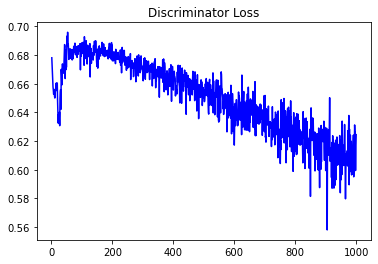

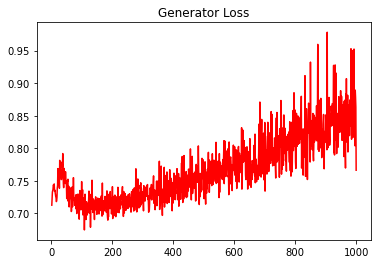

In [16]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc2,gen2,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN2_metrics=ABC_train_test2.test_generator(gen2,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_2 Metrics",ABC_GAN2_metrics)

print("MAE")
print(mean(ABC_GAN2_metrics[1]))

MAE
0.44633865692093966


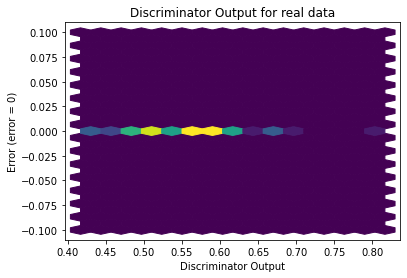

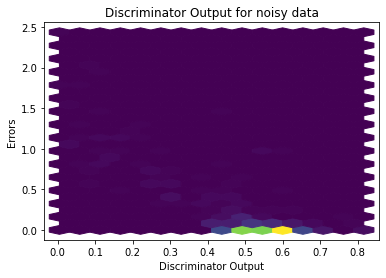

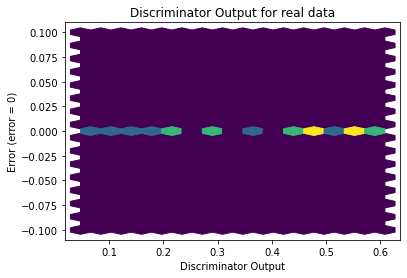

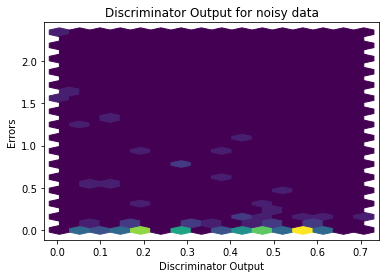

In [18]:
sanityChecks.discProbVsError(train_data,disc2,device)
sanityChecks.discProbVsError(test_data,disc2,device)

# skipGAN Model

In [19]:
# #Generator
# gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
# constraints=network.weightConstraint()
# #Discriminator 
# disc3 = network.Discriminator(n_features+1).to(device)

# criterion = torch.nn.BCELoss()
# gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.01, betas=(0.5, 0.999))
# disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.01, betas=(0.5, 0.999))


In [20]:
# ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [21]:
# ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
# sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

# print("MAE")
# print(mean(ABC_GAN3_metrics[1]))

In [22]:
# sanityChecks.discProbVsError(train_data,disc3,device)
# sanityChecks.discProbVsError(test_data,disc3,device)

# skipGAN Model with TabNet Generator

In [23]:
#Generator
gen4 = network.GeneratorTabnetskipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc4 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen4.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc4.parameters(), lr=0.001, betas=(0.5, 0.999))


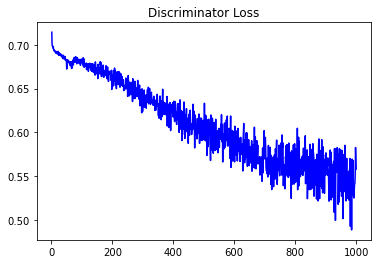

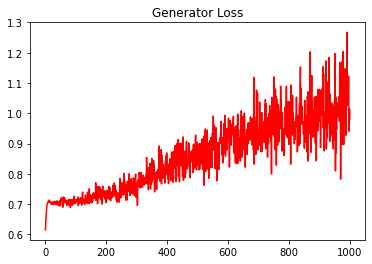

In [24]:
ABC_train_test2.training_GAN_skip_connection(disc4,gen4,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [25]:
ABC_GAN4_metrics=ABC_train_test2.test_generator(gen4,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_4 Metrics",ABC_GAN4_metrics)

print("MAE")
print(mean(ABC_GAN4_metrics[1]))

MAE
0.39041643592901526


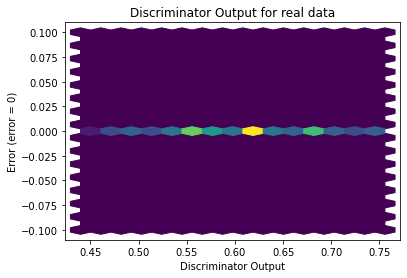

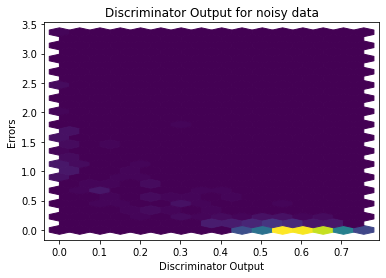

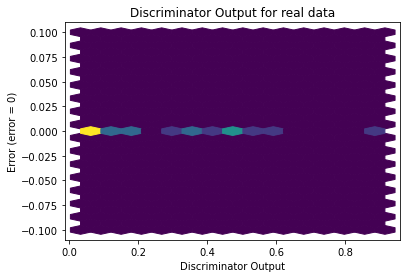

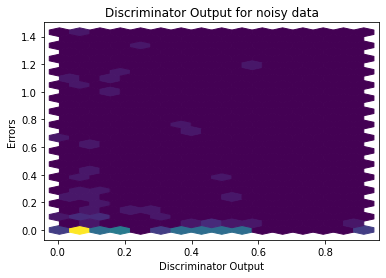

In [26]:
sanityChecks.discProbVsError(train_data,disc4,device)
sanityChecks.discProbVsError(test_data,disc4,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [27]:
# print("Weight of the node at skip connection")
# for name,param in gen3.named_parameters():
#     if(name == "skipNode.weight"):
#         print(param)
#         sb.glue("Skip Connection Weight",param.item())

## skipGAN Model Analysis (TabNet Generator) 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [28]:
print("Weight of the node at skip connection")
for name,param in gen4.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.7008]], requires_grad=True)
